In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx
import networkx as nx
import datetime
from datetime import date, timedelta




## checked the contents of the datasets

In [3]:
checkin_state = pd.read_csv('checkin_state.csv')
checkin_state

date             state  checkins  unique_ind  unique_loc
0     2020-12-01             Johor   1996696      868521       81635
1     2020-12-01             Kedah    654634      341620       32760
2     2020-12-01          Kelantan    186507      108035       16298
3     2020-12-01            Melaka    544619      241854       21458
4     2020-12-01   Negeri Sembilan    559390      266899       22749
...          ...               ...       ...         ...         ...
6395  2022-01-04          Selangor   6726011     3178070      175415
6396  2022-01-04        Terengganu    463482      246077       20700
6397  2022-01-04  W.P. KualaLumpur   4844120     2290948       98474
6398  2022-01-04       W.P. Labuan     82915       33625        2137
6399  2022-01-04    W.P. Putrajaya    254835      157850        2936

[6400 rows x 5 columns]

In [4]:
cases_state = pd.read_csv('cases_state.csv')
cases_state 

date              state  cases_new  cases_import  \
0      2020-01-25              Johor          4             4   
1      2020-01-25              Kedah          0             0   
2      2020-01-25           Kelantan          0             0   
3      2020-01-25             Melaka          0             0   
4      2020-01-25    Negeri Sembilan          0             0   
...           ...                ...        ...           ...   
11387  2022-01-05           Selangor        908            44   
11388  2022-01-05         Terengganu        128             2   
11389  2022-01-05  W.P. Kuala Lumpur        245            70   
11390  2022-01-05        W.P. Labuan         15             5   
11391  2022-01-05     W.P. Putrajaya         25             2   

       cases_recovered  cases_active  cases_cluster  cases_unvax  cases_pvax  \
0                    0             4              0            4           0   
1                    0             0              0            0           0   
2                    0             0              0            0           0   
3                    0             0              0            0           0   
4                    0             0              0            0           0   
...                ...           ...            ...          ...         ...   
11387              906         10207              9          175           5   
11388              168          1906              0           25           1   
11389              276          2845              0           48           4   
11390                5            68              3            3           0   
11391               18           390              0            5           0   

       cases_fvax  ...  cases_0_4  cases_5_11  cases_12_17  cases_18_29  \
0               0  ...          0           0            0            0   
1               0  ...          0           0            0            0   
2               0  ...          0           0            0            0   
3               0  ...          0           0            0            0   
4               0  ...          0           0            0            0   
...           ...  ...        ...         ...          ...          ...   
11387         656  ...         45          74           37          235   
11388          84  ...          7           3            2           22   
11389         167  ...          8          14            6           62   
11390           9  ...          0           3            1            2   
11391          16  ...          0           4            4            4   

       cases_30_39  cases_40_49  cases_50_59  cases_60_69  cases_70_79  \
0                0            1            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
11387          216          107           82           67           28   
11388           27           22           19           13            7   
11389           76           35           22           18            2   
11390            4            3            1            0            1   
11391            3            6            3            1            0   

       cases_80  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
11387         6  
11388         6  
11389         2  
11390         0  
11391         0  

[11392 rows x 25 columns]

In [5]:
clusters = pd.read_csv('clusters.csv')
clusters

cluster         state       district  \
0                          KLUSTER WARGA JEPUN            14  LEMBAH PANTAI   
1                                  KLUSTER UDA  1,5,10,14,16       PELBAGAI   
2     KLUSTER KEAGAMAAN (TABLIGH SRI PETALING)             0       PELBAGAI   
3                    KLUSTER TABLIGH NEW DELHI    5,10,14,16       PELBAGAI   
4                                KLUSTER AIROD             6        KUANTAN   
...                                        ...           ...            ...   
6138                   KLUSTER PARIT CHE MANJA             8    HILIR PERAK   
6139                    KLUSTER JALAN HAMILTON             7     TIMUR LAUT   
6140         KLUSTER KAMPUNG TOK PANJANG SAUDI             3     KOTA BHARU   
6141      KLUSTER SIMPANG PINGGIRAN TONGKANG 2             1     BATU PAHAT   
6142                      KLUSTER JALAN DURIAN             8          KINTA   

     date_announced date_last_onset   category  status  cases_new  \
0          1/3/2020        9/3/2020     import   ended          0   
1          4/3/2020        1/3/2020     import   ended          0   
2         13/3/2020       11/3/2020  religious   ended          0   
3         16/3/2020       20/3/2020     import   ended          0   
4         31/3/2020       31/3/2020  workplace   ended          0   
...             ...             ...        ...     ...        ...   
6138       4/1/2022        3/1/2022  education  active          0   
6139       5/1/2022        4/1/2022   highRisk  active          9   
6140       5/1/2022        4/1/2022     import  active          1   
6141       5/1/2022        4/1/2022  workplace  active         12   
6142       5/1/2022        4/1/2022   highRisk  active         15   

      cases_total  cases_active  tests  icu  deaths  recovered  \
0               3             0    267    0       0          3   
1             144             0   1864    0       2        142   
2            2022             0  42023    0      34       1988   
3              24             0     57    0       0         24   
4              65             0    734    0       0         65   
...           ...           ...    ...  ...     ...        ...   
6138           15            15     45    0       0          0   
6139           12            12     24    0       0          0   
6140            7             7      8    0       0          0   
6141           22            22    836    0       0          0   
6142           16            16     26    0       0          0   

                                             summary_bm  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
6138  Kluster ini melibatkan kakitangan dan pelajar-...   
6139  Kluster ini melibatkan penghuni-penghuni dan p...   
6140  The index case for this cluster is a 53-year-o...   
6141  Kluster ini merupakan kluster berulang kali ke...   
6142  Kluster ini melibatkan kakitangan dan penghuni...   

                                             summary_en  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
6138  This cluster involves the staff and students o...  
6139  This cluster involves residents and employees ...  
6140  The index case for this cluster is a 53-year-o...  
6141  This cluster is the second recurring cluster a...  
6142  The cluster involves staff and residents at a ...  

[6143 rows x 16 columns]

## Chose the variables to be used from each dataset

In [6]:
cases_df = pd.read_csv("cases_state.csv", usecols = ['date','state','cases_new','cases_child','cases_adolescent', 'cases_adult','cases_elderly'])
print(cases_df)

             date              state  cases_new  cases_child  \
0      2020-01-25              Johor          4            0   
1      2020-01-25              Kedah          0            0   
2      2020-01-25           Kelantan          0            0   
3      2020-01-25             Melaka          0            0   
4      2020-01-25    Negeri Sembilan          0            0   
...           ...                ...        ...          ...   
11387  2022-01-05           Selangor        908          119   
11388  2022-01-05         Terengganu        128           10   
11389  2022-01-05  W.P. Kuala Lumpur        245           22   
11390  2022-01-05        W.P. Labuan         15            3   
11391  2022-01-05     W.P. Putrajaya         25            4   

       cases_adolescent  cases_adult  cases_elderly  
0                     0            1              0  
1                     0            0              0  
2                     0            0              0  
3              

## Converted the dates into the same format




In [7]:
cases_df['date'] = pd.to_datetime(cases_df.date)
cases_df


date              state  cases_new  cases_child  cases_adolescent  \
0     2020-01-25              Johor          4            0                 0   
1     2020-01-25              Kedah          0            0                 0   
2     2020-01-25           Kelantan          0            0                 0   
3     2020-01-25             Melaka          0            0                 0   
4     2020-01-25    Negeri Sembilan          0            0                 0   
...          ...                ...        ...          ...               ...   
11387 2022-01-05           Selangor        908          119                37   
11388 2022-01-05         Terengganu        128           10                 2   
11389 2022-01-05  W.P. Kuala Lumpur        245           22                 6   
11390 2022-01-05        W.P. Labuan         15            3                 1   
11391 2022-01-05     W.P. Putrajaya         25            4                 4   

       cases_adult  cases_elderly  
0                1              0  
1                0              0  
2                0              0  
3                0              0  
4                0              0  
...            ...            ...  
11387          640            101  
11388           90             26  
11389          195             22  
11390           10              1  
11391           16              1  

[11392 rows x 7 columns]

## Fixed the range of the dates to December, Jan and Feb

In [8]:
cases_df = cases_df.loc[ ( cases_df['date'] >= '2020-12-01') & (cases_df['date'] <= '2021-05-31' )]
cases_df

date              state  cases_new  cases_child  cases_adolescent  \
4976 2020-12-01              Johor         68           15                 7   
4977 2020-12-01              Kedah         21            0                 1   
4978 2020-12-01           Kelantan         10            1                 1   
4979 2020-12-01             Melaka          0            0                 0   
4980 2020-12-01    Negeri Sembilan        146            2                 0   
...         ...                ...        ...          ...               ...   
7883 2021-05-31           Selangor       2111          306               135   
7884 2021-05-31         Terengganu        204           31                21   
7885 2021-05-31  W.P. Kuala Lumpur        387           36                16   
7886 2021-05-31        W.P. Labuan        166           32                13   
7887 2021-05-31     W.P. Putrajaya         28            9                 1   

      cases_adult  cases_elderly  
4976           38              8  
4977           14              6  
4978            7              1  
4979            0              0  
4980          142              2  
...           ...            ...  
7883         1442            197  
7884          120             31  
7885          272             39  
7886          106             13  
7887           15              3  

[2912 rows x 7 columns]

## Selected Sabah as the district to analyse

In [9]:
cases_df = cases_df.loc[cases_df['state'].isin(['Sabah'])]
cases_df

date  state  cases_new  cases_child  cases_adolescent  cases_adult  \
4985 2020-12-01  Sabah        267           29                21          202   
5001 2020-12-02  Sabah        229           37                19          153   
5017 2020-12-03  Sabah        310           53                22          211   
5033 2020-12-04  Sabah        320           59                28          198   
5049 2020-12-05  Sabah        391           50                35          270   
...         ...    ...        ...          ...               ...          ...   
7817 2021-05-27  Sabah        217           39                18          136   
7833 2021-05-28  Sabah        308           49                39          187   
7849 2021-05-29  Sabah        265           39                27          181   
7865 2021-05-30  Sabah        190           30                28          112   
7881 2021-05-31  Sabah        207           35                29          114   

      cases_elderly  
4985             15  
5001             18  
5017             20  
5033             33  
5049             33  
...             ...  
7817             24  
7833             32  
7849             16  
7865             20  
7881             28  

[182 rows x 7 columns]

In [10]:
cases_df.count(axis='rows')

date                182
state               182
cases_new           182
cases_child         182
cases_adolescent    182
cases_adult         182
cases_elderly       182
dtype: int64

In [11]:
checkin_df = pd.read_csv("checkin_state.csv", usecols = ['date','state','checkins'])
print(checkin_df)

            date             state  checkins
0     2020-12-01             Johor   1996696
1     2020-12-01             Kedah    654634
2     2020-12-01          Kelantan    186507
3     2020-12-01            Melaka    544619
4     2020-12-01   Negeri Sembilan    559390
...          ...               ...       ...
6395  2022-01-04          Selangor   6726011
6396  2022-01-04        Terengganu    463482
6397  2022-01-04  W.P. KualaLumpur   4844120
6398  2022-01-04       W.P. Labuan     82915
6399  2022-01-04    W.P. Putrajaya    254835

[6400 rows x 3 columns]


In [12]:
checkin_df['date'] = pd.to_datetime(checkin_df.date)
checkin_df


date             state  checkins
0    2020-12-01             Johor   1996696
1    2020-12-01             Kedah    654634
2    2020-12-01          Kelantan    186507
3    2020-12-01            Melaka    544619
4    2020-12-01   Negeri Sembilan    559390
...         ...               ...       ...
6395 2022-01-04          Selangor   6726011
6396 2022-01-04        Terengganu    463482
6397 2022-01-04  W.P. KualaLumpur   4844120
6398 2022-01-04       W.P. Labuan     82915
6399 2022-01-04    W.P. Putrajaya    254835

[6400 rows x 3 columns]

In [13]:
checkin_df = checkin_df.loc[checkin_df['state'].isin(['Sabah'])]
checkin_df

date  state  checkins
9    2020-12-01  Sabah    740636
25   2020-12-02  Sabah    758731
41   2020-12-03  Sabah    743625
57   2020-12-04  Sabah    769607
73   2020-12-05  Sabah    777053
...         ...    ...       ...
6329 2021-12-31  Sabah   2216517
6345 2022-01-01  Sabah   1747858
6361 2022-01-02  Sabah   1818757
6377 2022-01-03  Sabah   1974892
6393 2022-01-04  Sabah   1981816

[400 rows x 3 columns]

In [14]:
checkin_df = checkin_df.loc[ ( checkin_df['date'] >= '2020-12-01') & (checkin_df['date'] <= '2021-05-31' )]
checkin_df

date  state  checkins
9    2020-12-01  Sabah    740636
25   2020-12-02  Sabah    758731
41   2020-12-03  Sabah    743625
57   2020-12-04  Sabah    769607
73   2020-12-05  Sabah    777053
...         ...    ...       ...
2841 2021-05-27  Sabah    939878
2857 2021-05-28  Sabah    541164
2873 2021-05-29  Sabah    348921
2889 2021-05-30  Sabah    188697
2905 2021-05-31  Sabah    672278

[182 rows x 3 columns]

In [15]:
checkin_df.count(axis='rows')

date        182
state       182
checkins    182
dtype: int64

In [16]:
cluster_df = pd.read_csv("clusters.csv", usecols = ['date_announced','state','cases_new'])
print(cluster_df)

             state date_announced  cases_new
0               14       1/3/2020          0
1     1,5,10,14,16       4/3/2020          0
2                0      13/3/2020          0
3       5,10,14,16      16/3/2020          0
4                6      31/3/2020          0
...            ...            ...        ...
6138             8       4/1/2022          0
6139             7       5/1/2022          9
6140             3       5/1/2022          1
6141             1       5/1/2022         12
6142             8       5/1/2022         15

[6143 rows x 3 columns]


In [17]:
cluster_df['date_announced'] = pd.to_datetime(cluster_df.date_announced)
cluster_df

state date_announced  cases_new
0               14     2020-01-03          0
1     1,5,10,14,16     2020-04-03          0
2                0     2020-03-13          0
3       5,10,14,16     2020-03-16          0
4                6     2020-03-31          0
...            ...            ...        ...
6138             8     2022-04-01          0
6139             7     2022-05-01          9
6140             3     2022-05-01          1
6141             1     2022-05-01         12
6142             8     2022-05-01         15

[6143 rows x 3 columns]

In [18]:
cluster_df = cluster_df.loc[cluster_df['state'].isin(['12'])]
cluster_df

state date_announced  cases_new
25      12     2020-04-16          0
27      12     2020-04-16          0
31      12     2020-04-18          0
48      12     2020-05-13          0
65      12     2020-06-17          0
...    ...            ...        ...
6047    12     2021-12-14          0
6052    12     2021-12-15          0
6086    12     2021-12-22          0
6099    12     2021-12-25          0
6134    12     2022-03-01          2

[400 rows x 3 columns]

In [19]:
cluster_df = cluster_df.loc[ ( cluster_df['date_announced'] >= '2020-12-01') & (cluster_df['date_announced'] <= '2021-05-31' )]
cluster_df


state date_announced  cases_new
106     12     2020-12-09          0
165     12     2020-12-10          0
289     12     2020-12-11          0
409     12     2020-12-12          0
421     12     2020-12-16          0
...    ...            ...        ...
5508    12     2021-04-10          0
5511    12     2021-04-10          0
5782    12     2021-03-11          0
5787    12     2021-03-11          0
5951    12     2021-01-12          0

[141 rows x 3 columns]

## As 12 means Sabah, converted 12 to Sabah

In [20]:
cluster_df["state"].replace({"12": "Sabah"}, inplace=True)
cluster_df

C:\Users\sharo\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


state date_announced  cases_new
106   Sabah     2020-12-09          0
165   Sabah     2020-12-10          0
289   Sabah     2020-12-11          0
409   Sabah     2020-12-12          0
421   Sabah     2020-12-16          0
...     ...            ...        ...
5508  Sabah     2021-04-10          0
5511  Sabah     2021-04-10          0
5782  Sabah     2021-03-11          0
5787  Sabah     2021-03-11          0
5951  Sabah     2021-01-12          0

[141 rows x 3 columns]

In [21]:
cluster_df.rename(columns = {'date_announced':'date'}, inplace = True)
cluster_df

C:\Users\sharo\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


state       date  cases_new
106   Sabah 2020-12-09          0
165   Sabah 2020-12-10          0
289   Sabah 2020-12-11          0
409   Sabah 2020-12-12          0
421   Sabah 2020-12-16          0
...     ...        ...        ...
5508  Sabah 2021-04-10          0
5511  Sabah 2021-04-10          0
5782  Sabah 2021-03-11          0
5787  Sabah 2021-03-11          0
5951  Sabah 2021-01-12          0

[141 rows x 3 columns]

## Merged the cleaned datasets

In [22]:
cases_df['checkins'] = checkin_df['checkins'].values
cases_df


<ipython-input-22-cac51cea5b9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_df['checkins'] = checkin_df['checkins'].values


date  state  cases_new  cases_child  cases_adolescent  cases_adult  \
4985 2020-12-01  Sabah        267           29                21          202   
5001 2020-12-02  Sabah        229           37                19          153   
5017 2020-12-03  Sabah        310           53                22          211   
5033 2020-12-04  Sabah        320           59                28          198   
5049 2020-12-05  Sabah        391           50                35          270   
...         ...    ...        ...          ...               ...          ...   
7817 2021-05-27  Sabah        217           39                18          136   
7833 2021-05-28  Sabah        308           49                39          187   
7849 2021-05-29  Sabah        265           39                27          181   
7865 2021-05-30  Sabah        190           30                28          112   
7881 2021-05-31  Sabah        207           35                29          114   

      cases_elderly  checkins  
4985             15    740636  
5001             18    758731  
5017             20    743625  
5033             33    769607  
5049             33    777053  
...             ...       ...  
7817             24    939878  
7833             32    541164  
7849             16    348921  
7865             20    188697  
7881             28    672278  

[182 rows x 8 columns]

In [23]:
cases_df.count(axis='rows')

date                182
state               182
cases_new           182
cases_child         182
cases_adolescent    182
cases_adult         182
cases_elderly       182
checkins            182
dtype: int64

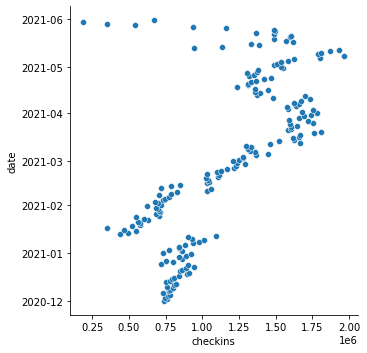

In [24]:
sns.relplot(x='checkins', y='date',data= cases_df)

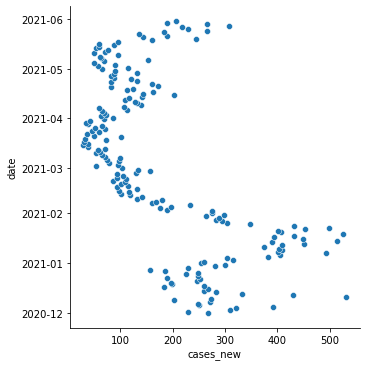

In [25]:
sns.relplot(x='cases_new', y='date',data= cases_df)

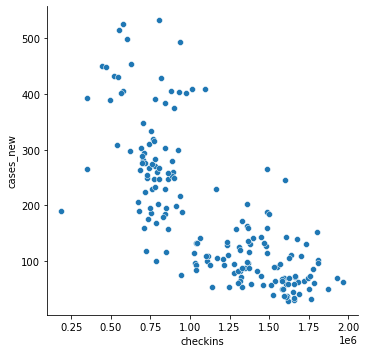

In [26]:
sns.relplot(x='checkins', y='cases_new',data= cases_df)

## Downloaded the dataframe into a csv file to look at it for rough work and analysis

In [27]:
#cases_df.to_csv(r'E:\university of malaya\Semester 1\Advanced Algorithm\project\new_final.csv', index=False)

In [28]:
cases_df['Month'] = pd.DatetimeIndex(cases_df['date']).month
cases_df['Month']= cases_df['Month'].map(str)

<ipython-input-28-dc4039df8339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_df['Month'] = pd.DatetimeIndex(cases_df['date']).month
<ipython-input-28-dc4039df8339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_df['Month']= cases_df['Month'].map(str)


In [29]:
cases_df["Month"].replace({"12": "December"}, inplace=True)
cases_df["Month"].replace({"1": "January"}, inplace=True)
cases_df["Month"].replace({"2": "February"}, inplace=True)
cases_df["Month"].replace({"3": "March"}, inplace=True)
cases_df["Month"].replace({"4": "April"}, inplace=True)
cases_df["Month"].replace({"5": "May"}, inplace=True)
cases_df

C:\Users\sharo\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


date  state  cases_new  cases_child  cases_adolescent  cases_adult  \
4985 2020-12-01  Sabah        267           29                21          202   
5001 2020-12-02  Sabah        229           37                19          153   
5017 2020-12-03  Sabah        310           53                22          211   
5033 2020-12-04  Sabah        320           59                28          198   
5049 2020-12-05  Sabah        391           50                35          270   
...         ...    ...        ...          ...               ...          ...   
7817 2021-05-27  Sabah        217           39                18          136   
7833 2021-05-28  Sabah        308           49                39          187   
7849 2021-05-29  Sabah        265           39                27          181   
7865 2021-05-30  Sabah        190           30                28          112   
7881 2021-05-31  Sabah        207           35                29          114   

      cases_elderly  checkins     Month  
4985             15    740636  December  
5001             18    758731  December  
5017             20    743625  December  
5033             33    769607  December  
5049             33    777053  December  
...             ...       ...       ...  
7817             24    939878       May  
7833             32    541164       May  
7849             16    348921       May  
7865             20    188697       May  
7881             28    672278       May  

[182 rows x 9 columns]

In [30]:
cases_df.to_csv(r'newly_cleaned.csv', index=False)

In [31]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\sharo\anaconda3\lib\site-packages (5.5.0)


In [32]:

px.scatter(cases_df, x='checkins', y= 'cases_new', 
           
           color='cases_new', size= 'cases_new', size_max=30,color_continuous_scale="bluyl", labels={"checkins":"Number of checkins","cases_new":"Number of cases reported"})




In [33]:
q = px.scatter(cases_df, x="date", y="cases_new", color='checkins', color_continuous_scale="bluyl", labels={"cases_new":"Number of csaes reported","date":"Date","checkins":"Number of checkins"},
              title="Trend of number of reported cases against with Date",height=600)
q.show()

In [34]:
q.write_html("scatteralll.html")

In [35]:

s = px.bar(cases_df, x="Month", y="cases_new", color="checkins", 
       height=600,color_continuous_scale="bluyl", labels={"cases_new":"Number of cases reported","checkins":"Number of Checkins"},
          title="Number of reported cases in a month with number of checkins")
s


In [36]:
s.write_html("bar.html")

In [37]:
cases_df.date

4985   2020-12-01
5001   2020-12-02
5017   2020-12-03
5033   2020-12-04
5049   2020-12-05
          ...    
7817   2021-05-27
7833   2021-05-28
7849   2021-05-29
7865   2021-05-30
7881   2021-05-31
Name: date, Length: 182, dtype: datetime64[ns]

In [38]:
m = px.scatter(cases_df, x="checkins", y="cases_new", animation_frame="Month", animation_group="cases_new",
           size="cases_new", color="checkins", hover_name="date",range_x=[300000,1400000], range_y=[25,700],color_continuous_scale="bluyl",
               labels={"cases_new":"Number of cases reported","checkins":"Number of checkins"},title="Breakdown of number of reported cases in every month",
              height=700)
           

m["layout"].pop("updatemenus") # optional, drop animation buttons
m.show()

In [39]:
m.write_html("slider.html")

## Draw graph network of state: sabah and date from cases_df

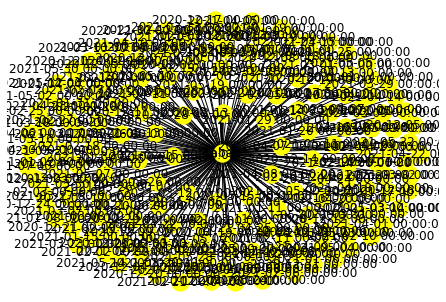

In [40]:
G2 = nx.from_pandas_edgelist(cases_df, source='state', target='date')
nx.draw(G2,node_color = 'yellow', with_labels=True)


## Draw graph network of date and checkins from cases_df

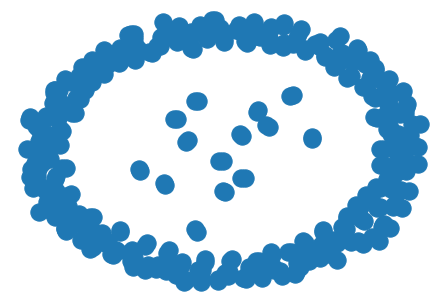

In [41]:
G3 = nx.from_pandas_edgelist(cases_df, source='date', target='checkins')
nx.draw(G3)


## Merged G2 and G3 to get S1, where it connects Sabah to date, and the date's corresponding to checkins to places in Sabah

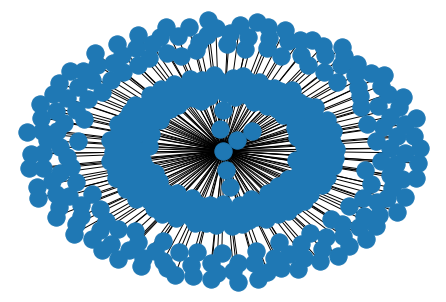

In [42]:
S1 = networkx.compose(G2, G3)
nx.draw(S1)

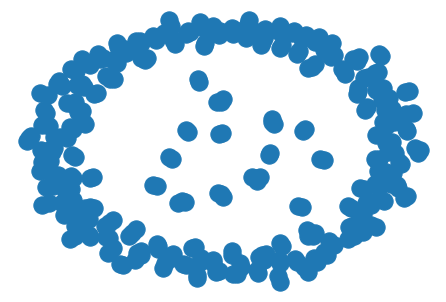

In [43]:
G4 = nx.from_pandas_edgelist(cases_df, source='date', target='cases_new')
nx.draw(G4)

## Connected date with both cases and checkins

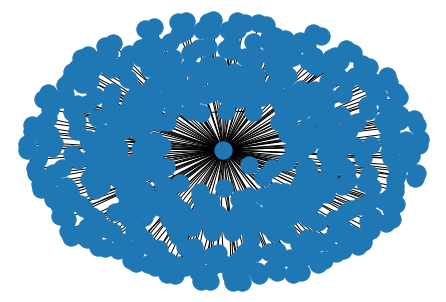

In [44]:
S2 = networkx.compose(S1, G4)
nx.draw(S2)

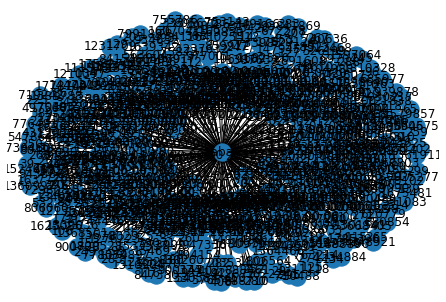

In [45]:
nx.draw(S2, with_labels='True')